In [455]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns
import os
import warnings
from sklearn.preprocessing import StandardScaler

In [456]:
#reading the data
a = pd.read_csv(r"D:\Users\AW0811\Desktop\My Uber Drives - 2016.csv")

In [457]:
#fetching dimension info
dim = a.shape
dim

(1155, 7)

In [458]:
#Data Cleaning using fillna ans mapping statements to convert categories to values
a["CATEGORY*"].fillna("Others", inplace = True)
a["PURPOSE*"].fillna("Others", inplace = True)
a=a.drop(columns=['START_DATE*','END_DATE*','START*','STOP*','CATEGORY*'])
a["PURPOSE*"]=a["PURPOSE*"].map({'Meal/Entertain':0,'Errand/Supplies':1,'Others':2,'Meeting':3,'Temporary Site':4,'Customer Visit':5,'Airport/Travel':6,'Between Offices':7,'Moving':8,'Charity ($)':9,'Commute':10})
a.head()

,MILES*,PURPOSE*
0,5.1,0
1,5.0,2
2,4.8,1
3,4.7,3
4,63.7,5


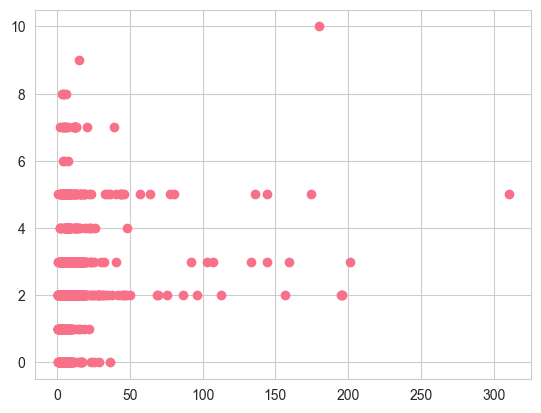

In [459]:
#scatter plot of unsegmented data
plt.scatter(a["MILES*"],a["PURPOSE*"])
plt.show()

C:\Users\AW0811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AW0811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AW0811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\AW0811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the va

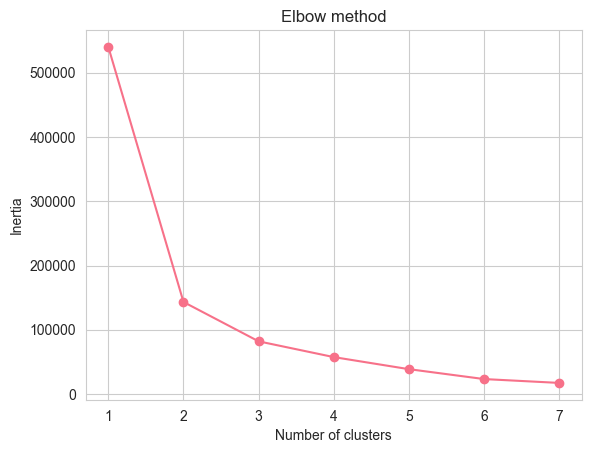

In [460]:
#finding best cluster number using elbow method
inertias = []
for i in range(1,8):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(a)
    inertias.append(kmeans.inertia_)

plt.plot(range(1,8), inertias, marker='o')
plt.title('Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

C:\Users\AW0811\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


<AxesSubplot:xlabel='MILES*', ylabel='PURPOSE*'>

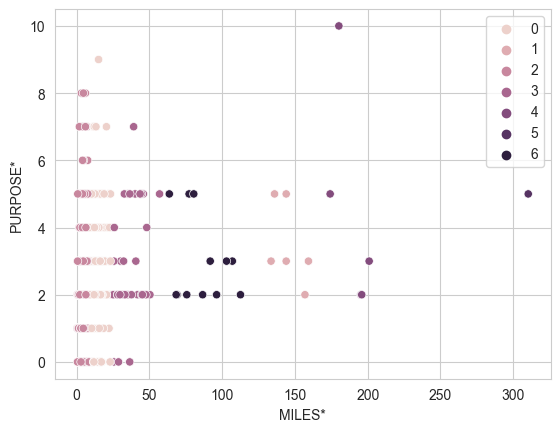

In [471]:
#applying kmeans clustering to find segments
kmeans = KMeans(n_clusters=7)
kmeans.fit(a)
sns.scatterplot(data=a, x="MILES*", y="PURPOSE*",hue=kmeans.labels_ )

In [472]:
#counting values in clusters to find maximum customer clusters
clusterCount = np.bincount(kmeans.labels_)
clusterCount

array([338,   6, 752,  40,   6,   1,  12], dtype=int64)